# Partial Least Squares Regression (PLSR) 

- Author: Mako Shibata (fortemoak81@gmail.com)
- Date: 07/07/2024 
- Aim: Learn the mechanism behind and the application of PLSR
- Tutorial: https://www.geeksforgeeks.org/partial-least-squares-regression-plsregression-using-sklearn/

What is PLSR ? 

- Optimal regression method based on covariance 
- Examine the relationship between independent and dependent variables.
- Difference from standard regression is that it identifies a multidimensional direction in the X space that explains the maximum multidimensional variance direction in the Y space. 
- Recommended in case of regression where 
    1) the number of explanatory variablbes are large, 
    2) the explanatory variables are correlated. 
    3) The number of observations is limited. 
    
- Allows simultaneous modelling of multiple dependent variables
    

In [1]:
# install sci-kit-learn
!pip install scikit-learn

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
# Load dataset

diabetes = datasets.load_diabetes()

Aim: Predict the progression of diabetes based on the input attributes. 

Attributes: 
- Age
- Sex
- BMI (Body Mass Index)
- BP (Average Blood Pressure)
- S1 (Total Serum Cholesterol)
- S2 (Low-Density Lipoproteins)
- S3 (High-Density Lipoproteins)
- S4 (Total Cholesterol / HDL Cholesterol ratio)
- S5 (log of serum triglycerides level)
- S6 (Blood sugar level)

Target variable: quantitative measure of disease progression one year after baseline. 



In [8]:
print(diabetes)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [9]:
X = diabetes.data
y = diabetes.target

In [11]:
# split training and testing data sets 
# test_size = 0.2 means 80% of dataset will be converted into training and 20% to testing. 
# random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Initialise PLS model with the desired number of components
n_components = 3 
pls_model = PLSRegression(n_components=n_components)

In [13]:
# fit the model on the training data 
pls_model.fit(X_train, y_train)

PLSRegression(n_components=3)

In [14]:
y_pred = pls_model.predict(X_test)

In [15]:
# Evaluate the model performance
r_squared = pls_model.score(X_test, y_test)
print(f"R-Squared Error: {r_squared}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

R-Squared Error: 0.46015344535176705
Mean Squared Error: 2860.188967440198


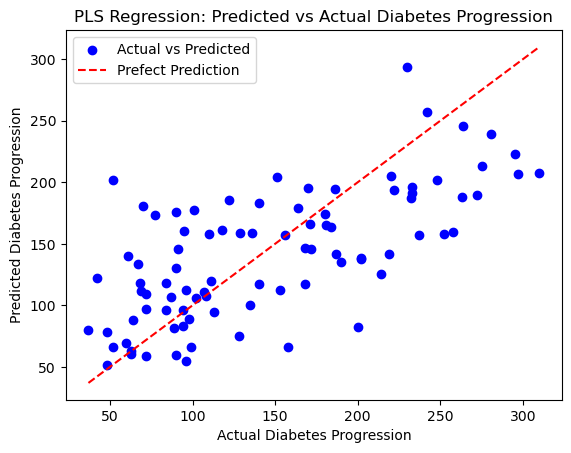

In [17]:
# Visualise predicted vs actual values: 
plt.scatter(y_test, y_pred, c='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', c='red', label='Prefect Prediction')

plt.xlabel('Actual Diabetes Progression')
plt.ylabel('Predicted Diabetes Progression')
plt.title('PLS Regression: Predicted vs Actual Diabetes Progression')
plt.legend()
plt.grid(False)
plt.show()

In [20]:
# Using SHAP to interpret the PLS model
!pip install shap
import shap
# Create a SHAP explainer for the PLS regression model using KernelExplainer
explainer = shap.KernelExplainer(pls_model.predict, X_train)

shap_values = explainer.shap_values(X_test)

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/5f/9e/dce41d5ec9e79add65faf4381d8d4492247b29daaa6cc7d7fd0298abc1e2/shap-0.46.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 3.6 MB/s eta 0:00:00a 0:00:01


Using 353 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/89 [00:00<?, ?it/s]

In [23]:
import shap
# Create a SHAP explainer for the PLS regression model using KernelExplainer
explainer = shap.KernelExplainer(pls_model.predict, X_train)

shap_values = explainer.shap_values(X_test)

Using 353 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/89 [00:00<?, ?it/s]

/Users/Owner/anaconda3/lib/python3.11/site-packages/shap/plots/_beeswarm.py:624: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


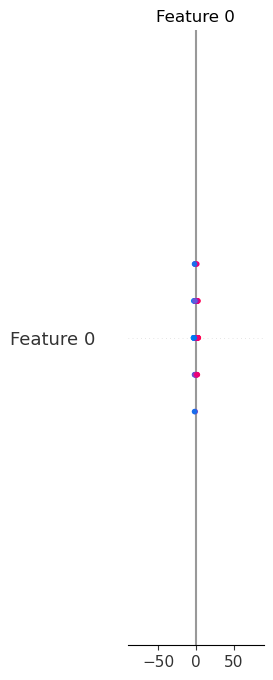

In [24]:
shap.summary_plot(shap_values, X_test)

This didn't work out well. I am not sure why. 

# Research questions applicable

- Determine which variable predicts the soil carbon content the most, based on surface temperature, photosynthetic rate, precipitation, soil depth..

- Soil porosity vs DBH. Soil porosity vs Soil Macrofauna Abundance. What impacts the soil porosity the most? 
